In [3]:
import json
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import pearsonr
from itertools import permutations
from clip2mesh.utils import Utils

utils = Utils()
warnings.filterwarnings("ignore")

def plot_correlations(jsons_dir: str, three_dmm: str):
    json_files = list(Path(jsons_dir).rglob("*_labels.json"))
    df = pd.DataFrame()
    for json_file in json_files:
        with open(json_file, "r") as f:
            json_data = json.load(f)
            df = df.append(json_data, ignore_index=True)
    df = df.apply(lambda x: [y[0][0] for y in x])
    permut_list = []
    for x, y in permutations(df.columns, 2):
        if (x, y) in permut_list or (y, x) in permut_list:
            continue
        permut_list.append((x, y))
    plot_shape = utils.get_plot_shape(len(permut_list))[0]
    fig, axs = plt.subplots(plot_shape[0], plot_shape[1], figsize=(20, 20))
    for i, (col1, col2) in enumerate(permut_list):
        axs[i // plot_shape[1], i % plot_shape[1]].scatter(df[col1], df[col2], alpha=0.3, marker='.', color='green')
        axs[i // plot_shape[1], i % plot_shape[1]].set_title(f"{col1} vs. {col2} -> {pearsonr(df[col1], df[col2]).statistic:.2f}")
        axs[i // plot_shape[1], i % plot_shape[1]].set_ylabel(col2)
        axs[i // plot_shape[1], i % plot_shape[1]].set_xlabel(col1)
        axs[i // plot_shape[1], i % plot_shape[1]].plot(
            df[col1], np.poly1d(np.polyfit(df[col1], df[col2], 1))(df[col1]), color="red", alpha=0.8,
        )
        axs[i // plot_shape[1], i % plot_shape[1]].set_xticks([])
        axs[i // plot_shape[1], i % plot_shape[1]].set_yticks([])
    fig.suptitle(f"Correlation between labels - {three_dmm}", fontsize=20)
    fig.tight_layout(pad=3.0)
    plt.show()
    fig.savefig(f"/home/nadav2/dev/data/CLIP2Shape/outs/labels_correlations/{three_dmm}.png")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# FLAME SHAPE

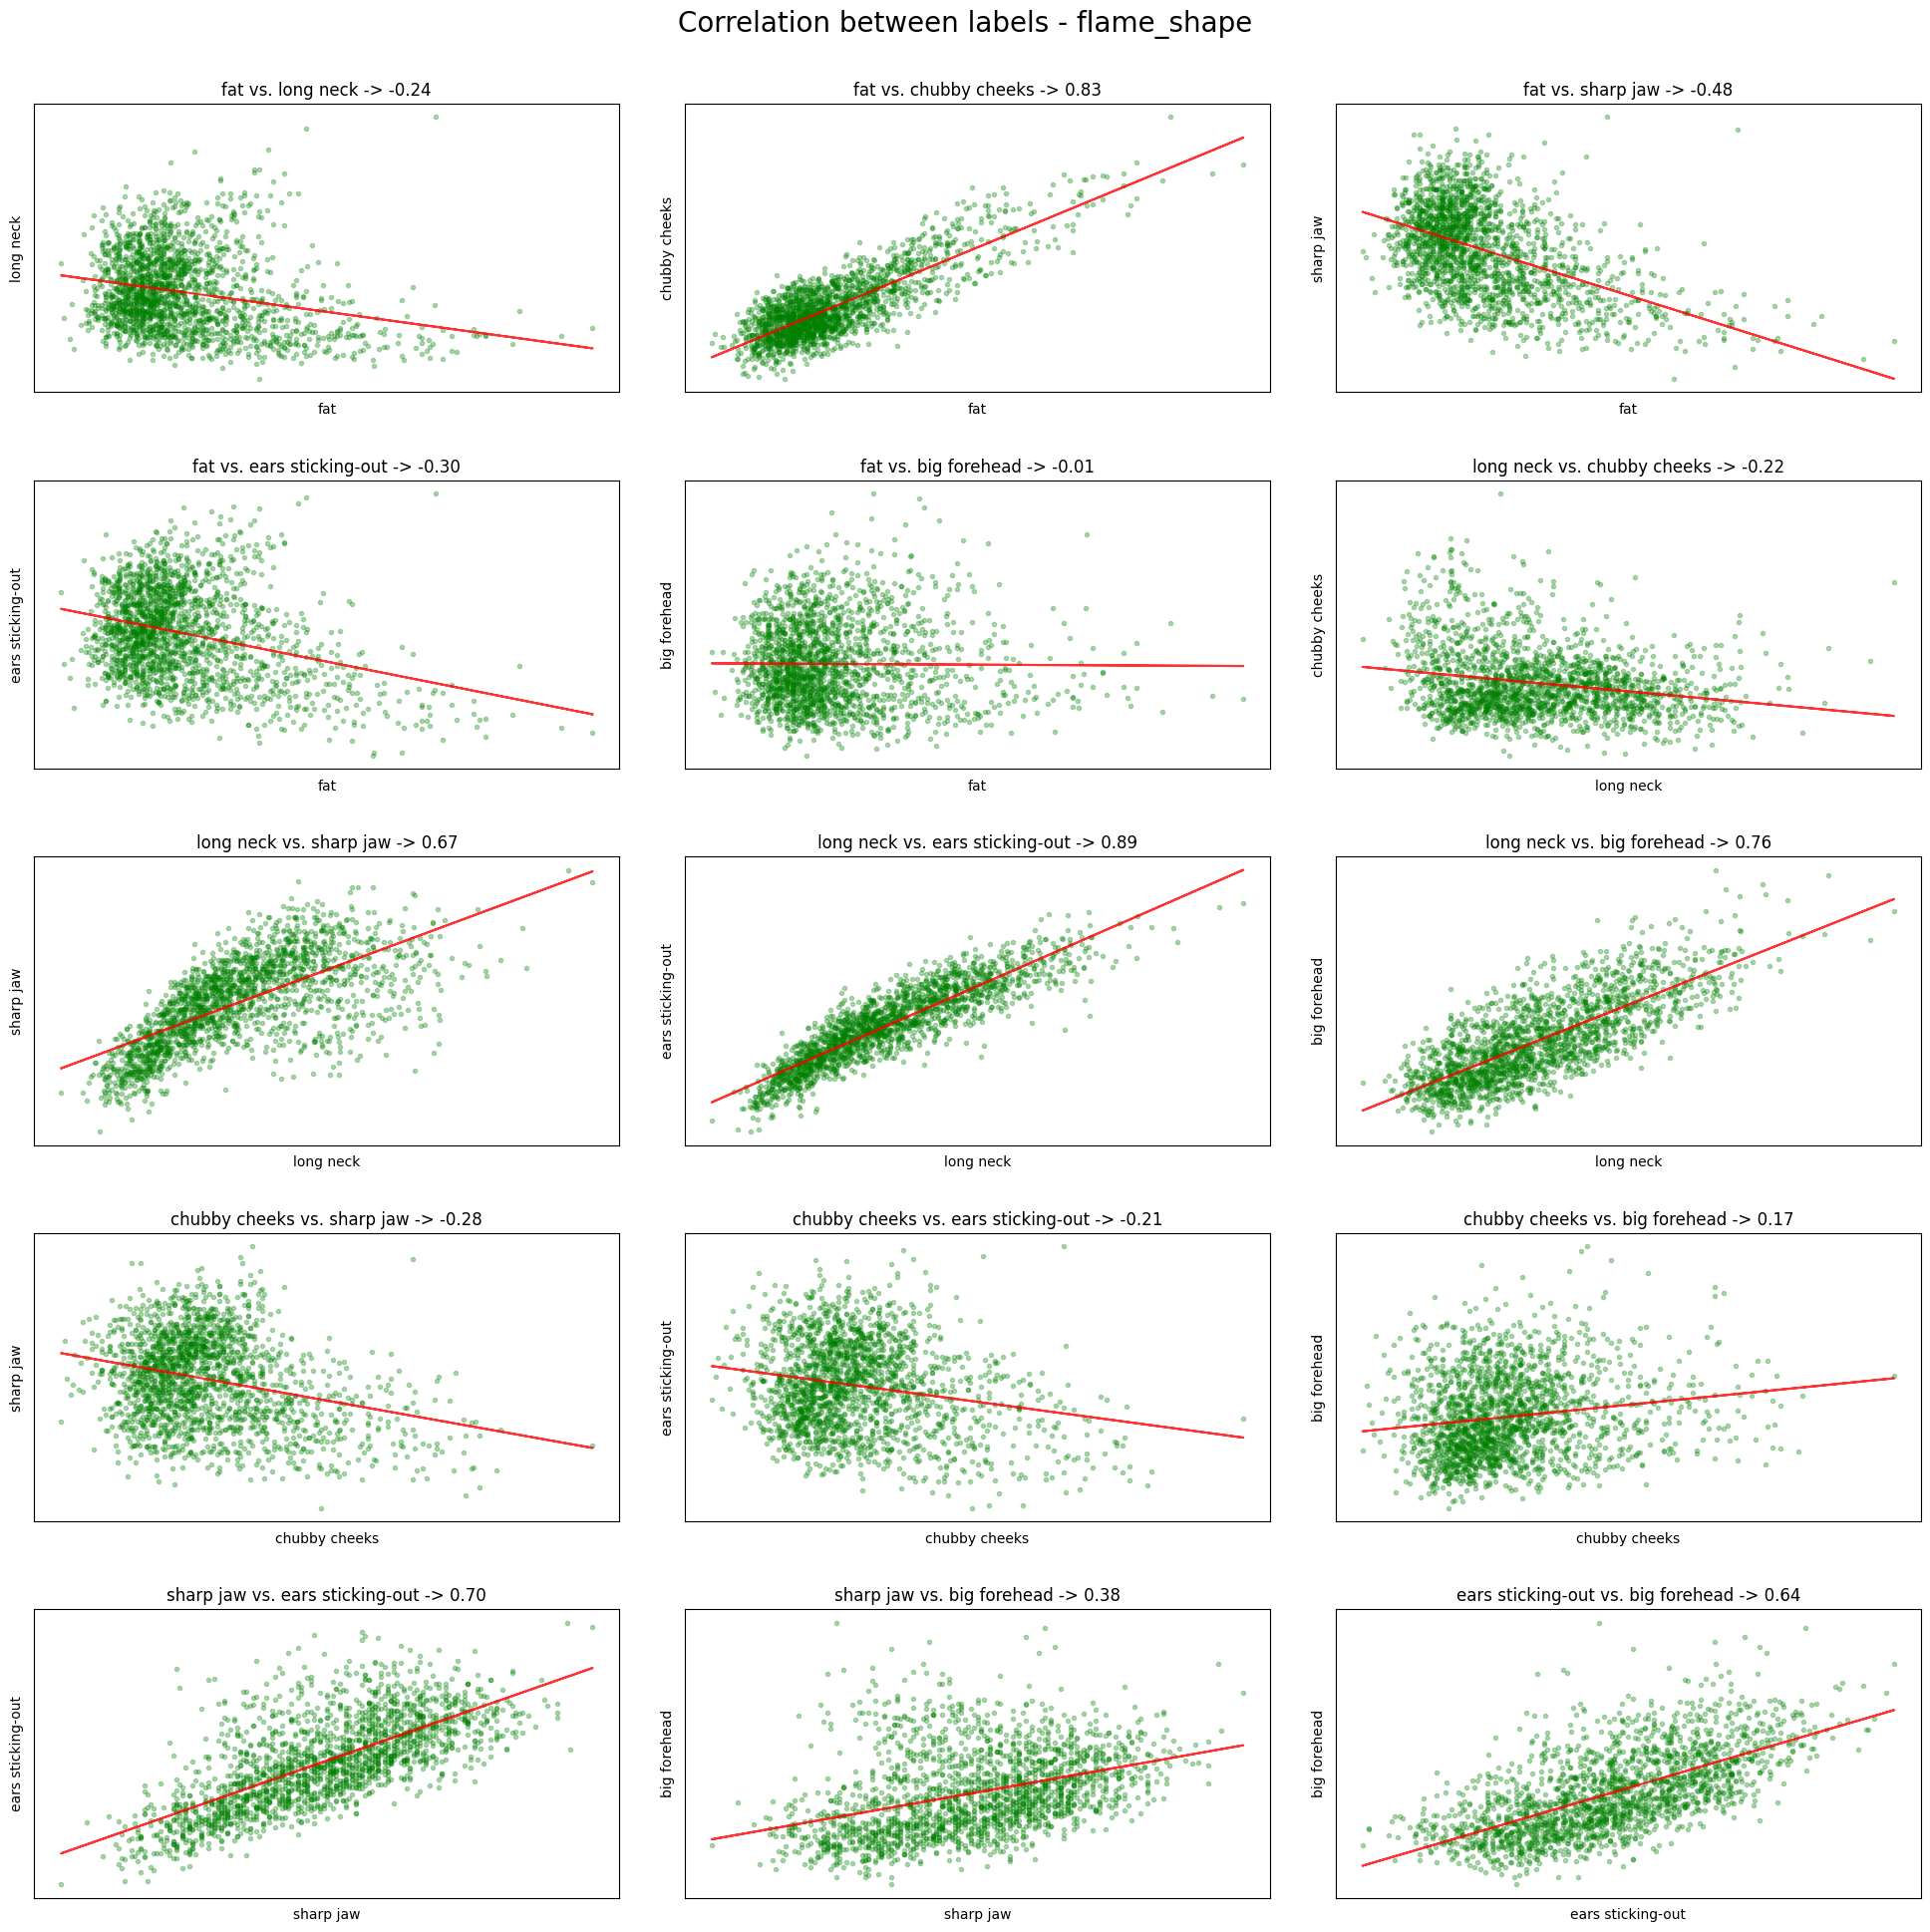

In [68]:
# create data frame from json files - columns are labels and rows are images
jsons_dir = "/home/nadav2/dev/data/CLIP2Shape/images/flame_shape_py3d"
plot_correlations(jsons_dir, "flame_shape")

# FLAME EXPRESSION

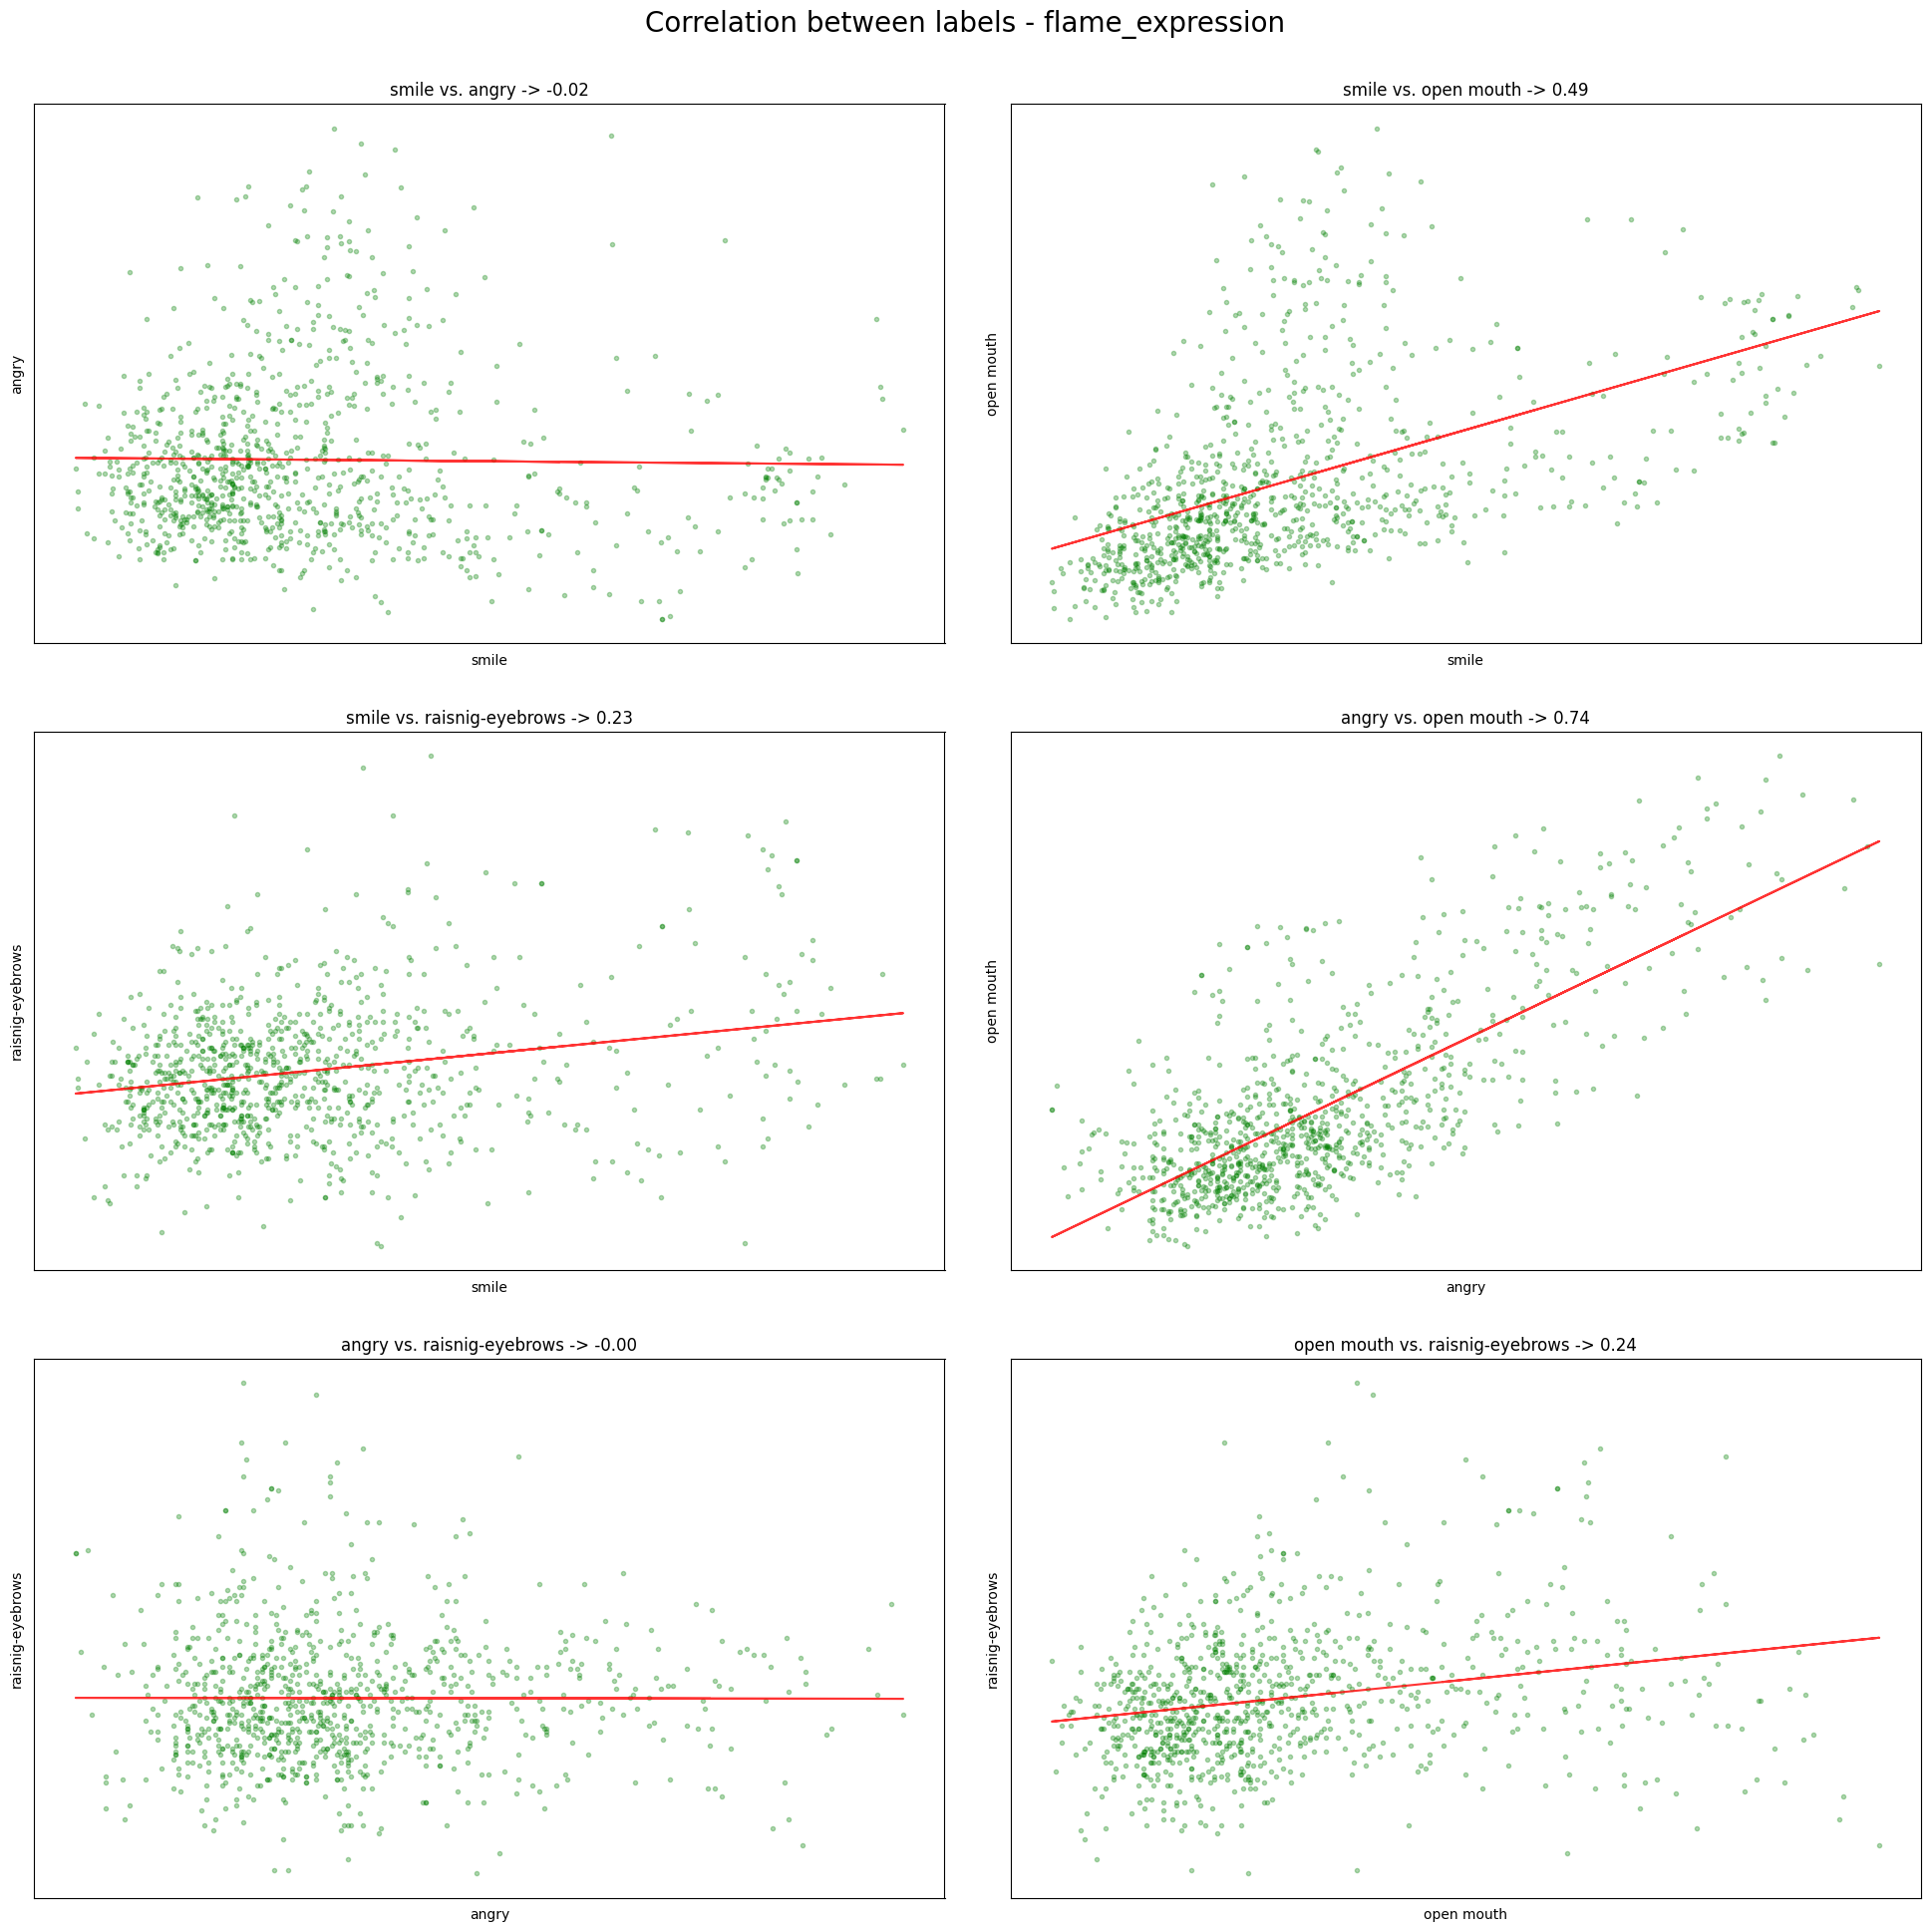

In [70]:
# create data frame from json files - columns are labels and rows are images
jsons_dir = "/home/nadav2/dev/data/CLIP2Shape/images/flame_textured_exp"
plot_correlations(jsons_dir=jsons_dir, three_dmm="flame_expression")

# SMPLX

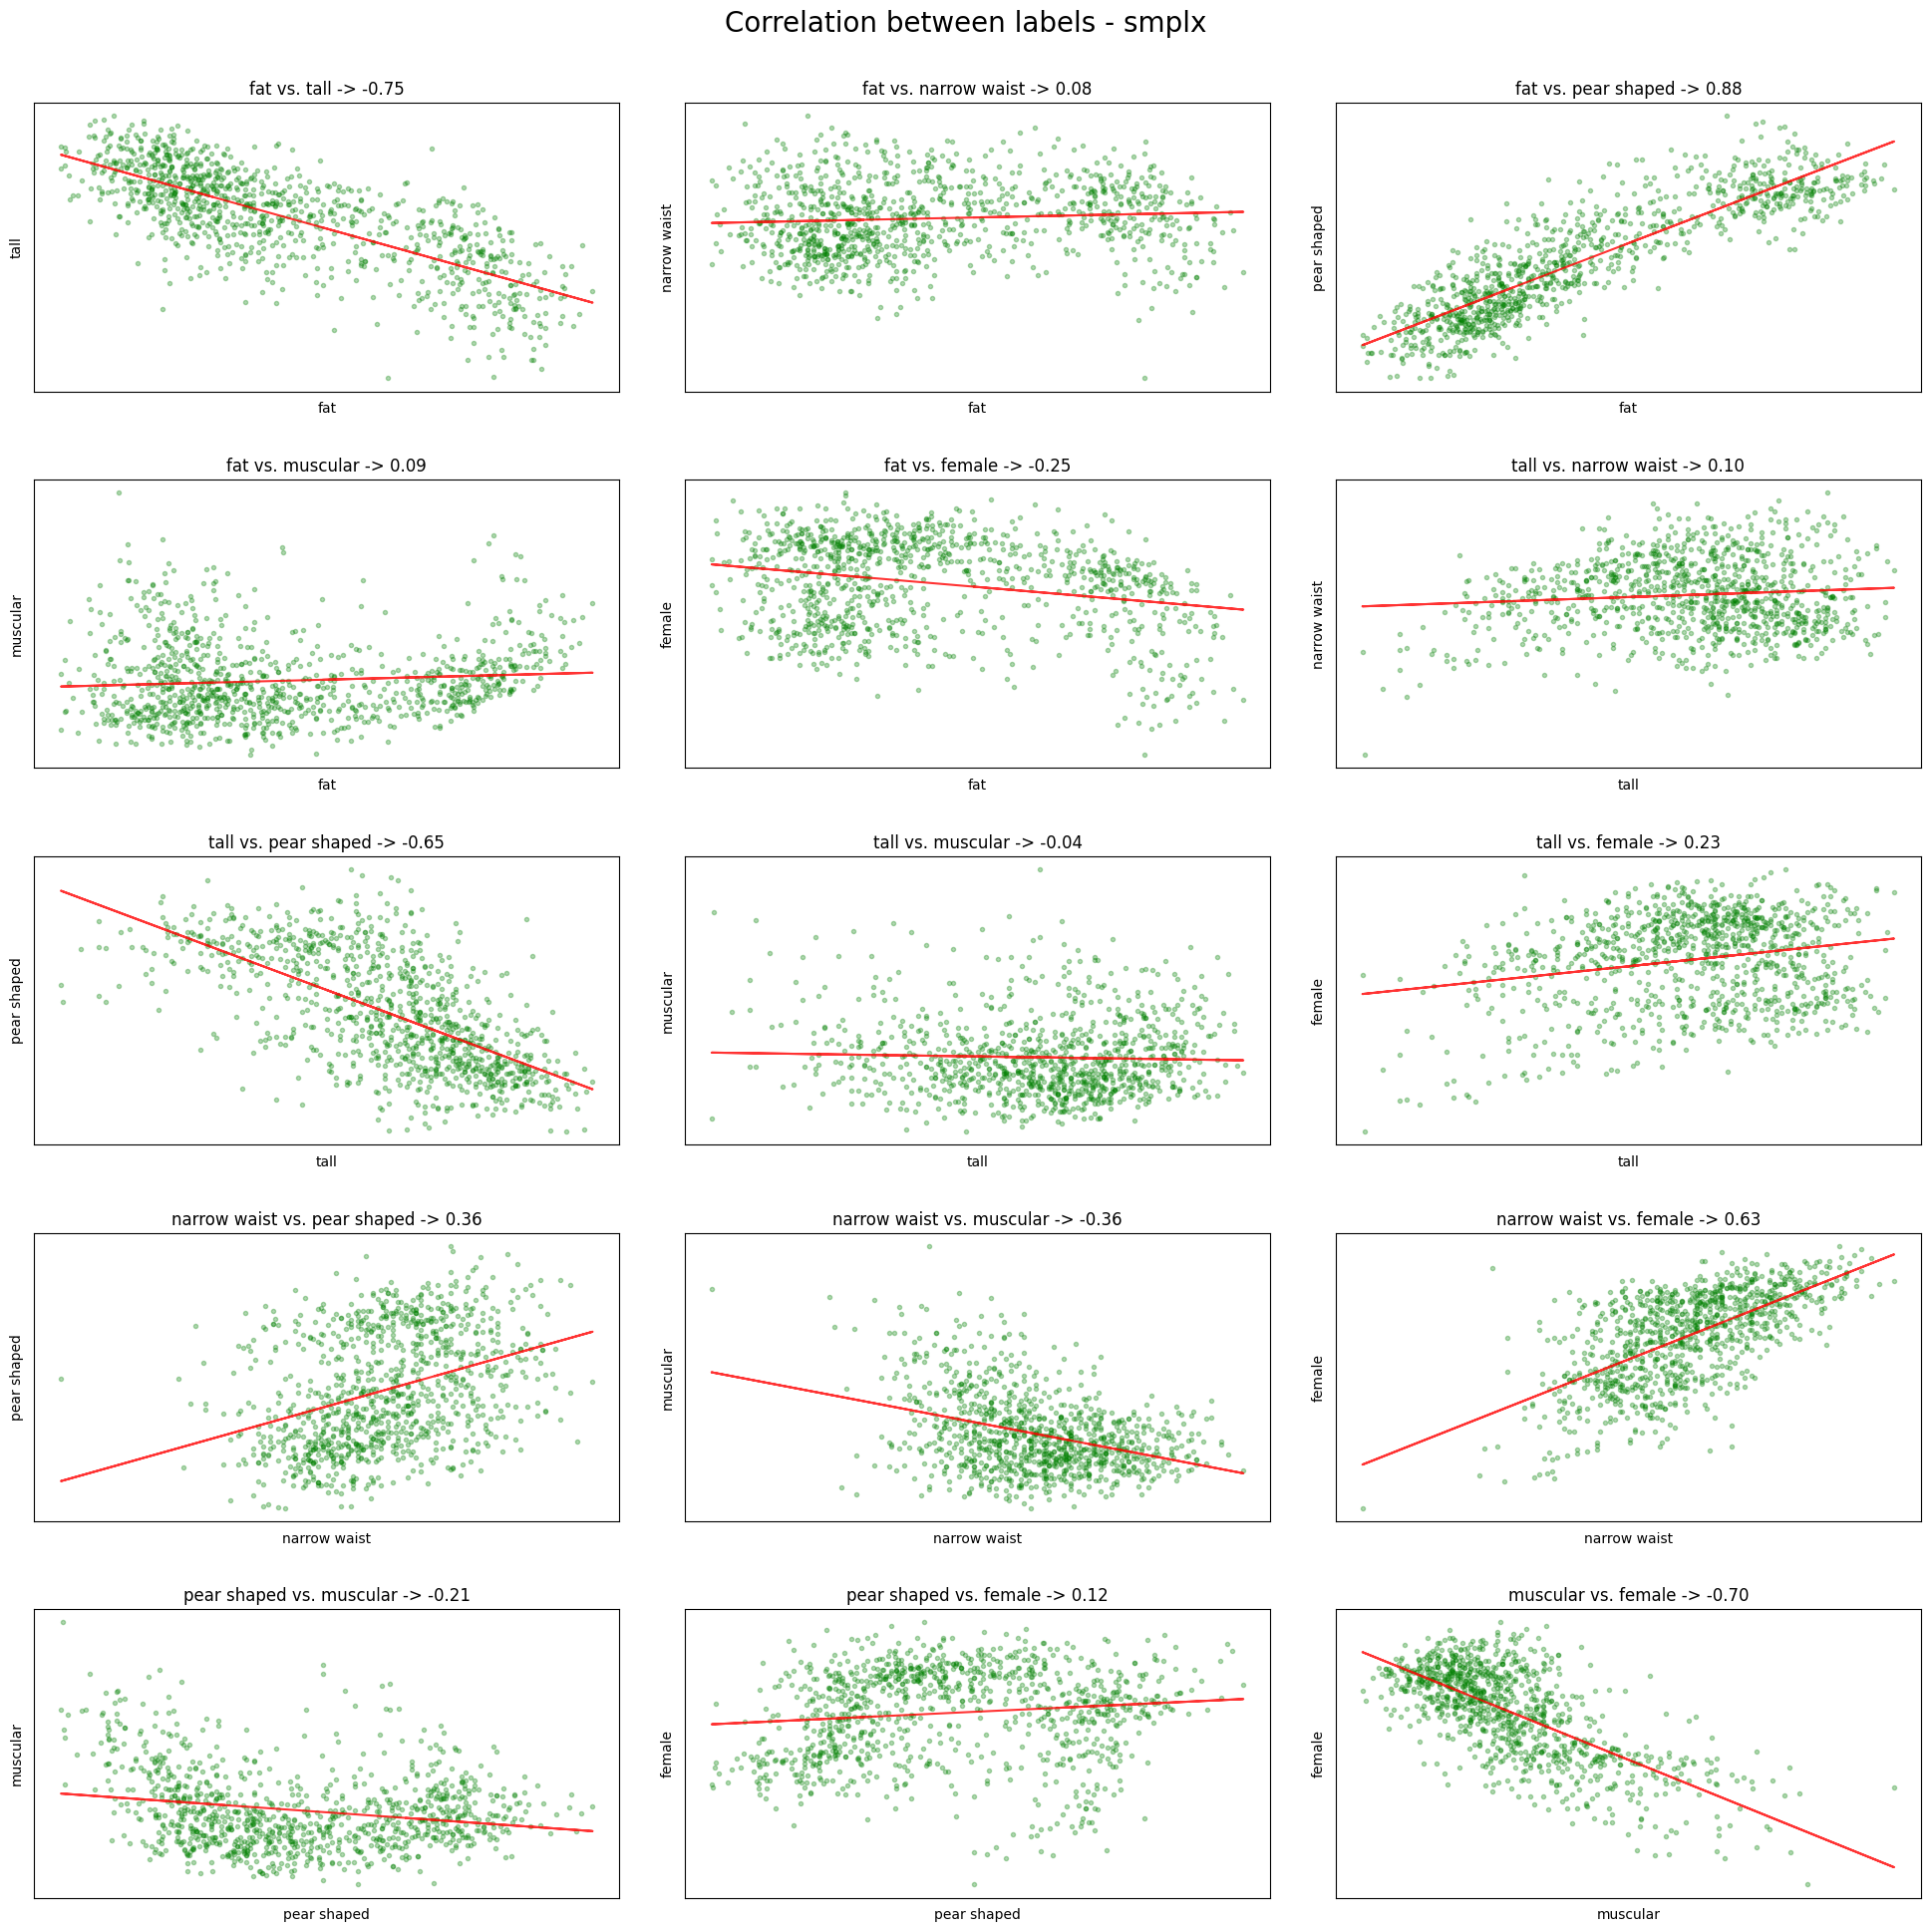

In [5]:
plot_correlations("/home/nadav2/dev/data/CLIP2Shape/images/with_texture", three_dmm="smplx")

# SMAL

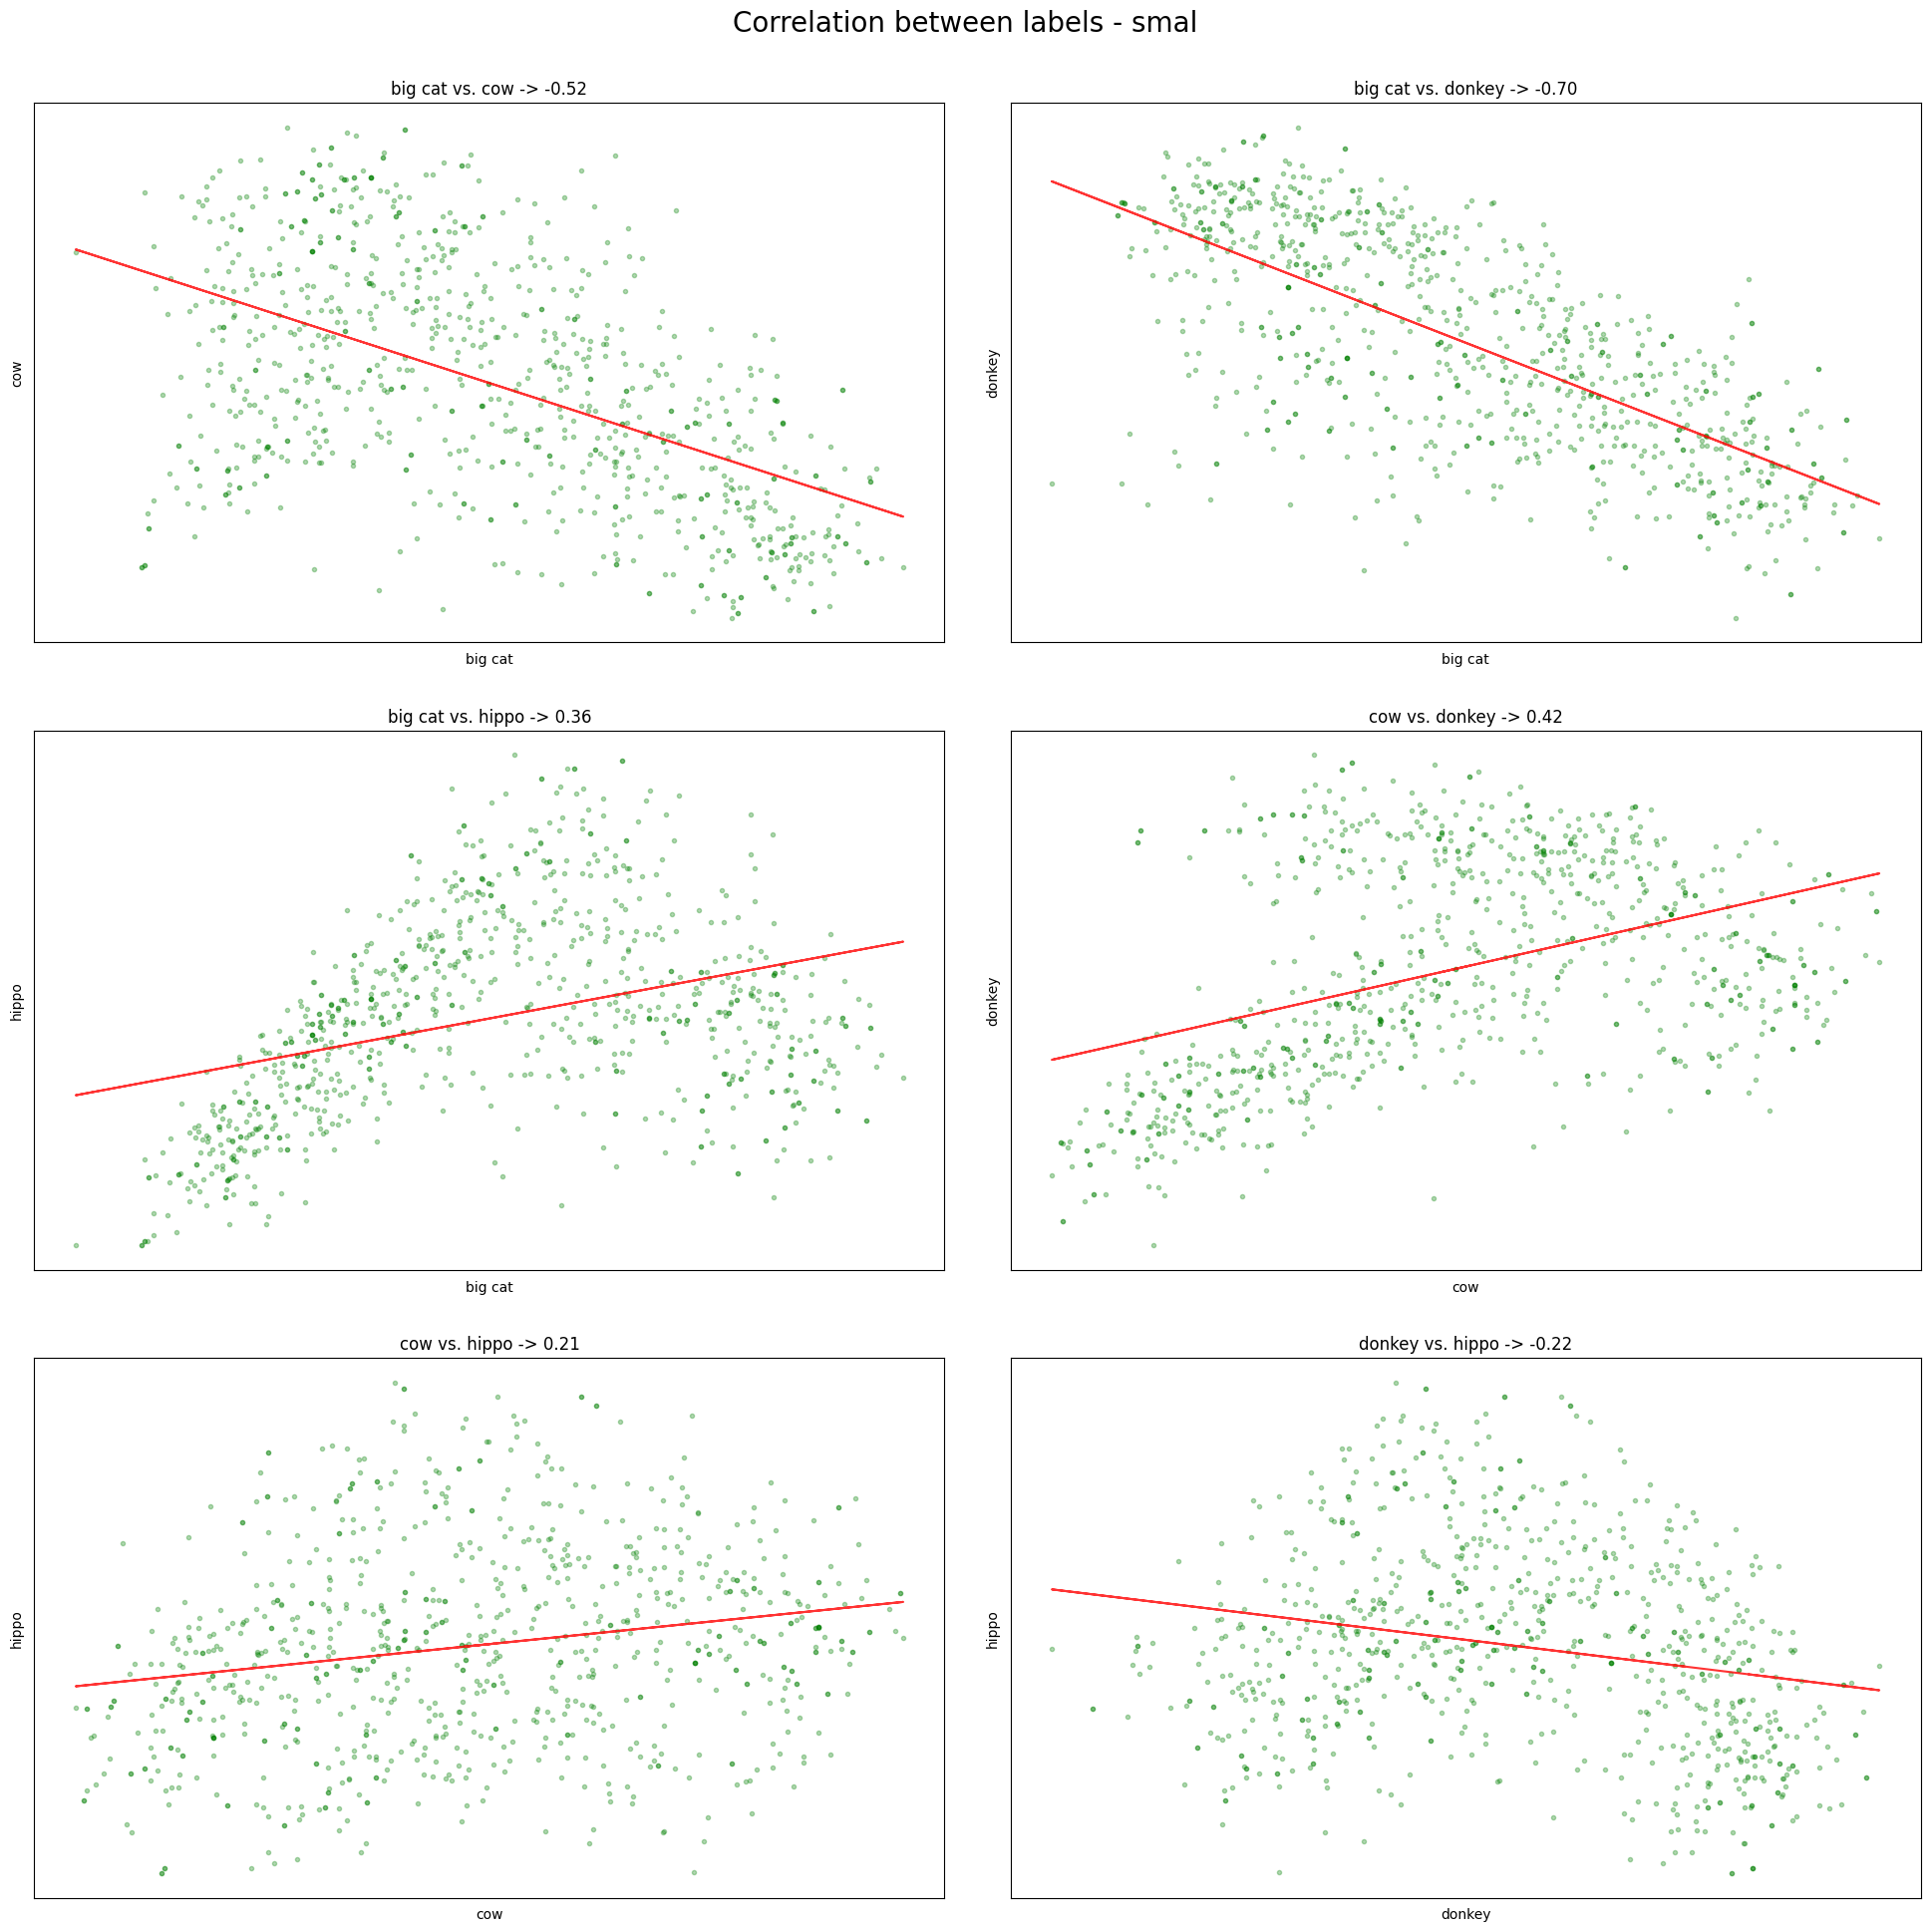

In [72]:
plot_correlations("/home/nadav2/dev/data/CLIP2Shape/images/smal_all_data", three_dmm="smal")

In [22]:
jsons_dir = "/home/nadav2/dev/data/CLIP2Shape/images/smplx_py3d_male_test"
json_files = list(Path(jsons_dir).rglob("*_labels.json"))
df = pd.DataFrame()
for json_file in json_files:
    with open(json_file, "r") as f:
        json_data = json.load(f)
        json_df = pd.DataFrame.from_dict(json_data)
        df = pd.concat([df, json_data], ignore_index=True)
df = df.apply(lambda x: [y[0][0] for y in x])

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1134, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 311, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/home/nadav2/anaconda3/envs/trueself_clone/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2062, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/home/nadav2/anaconda3/envs/trueself_clone/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2098, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

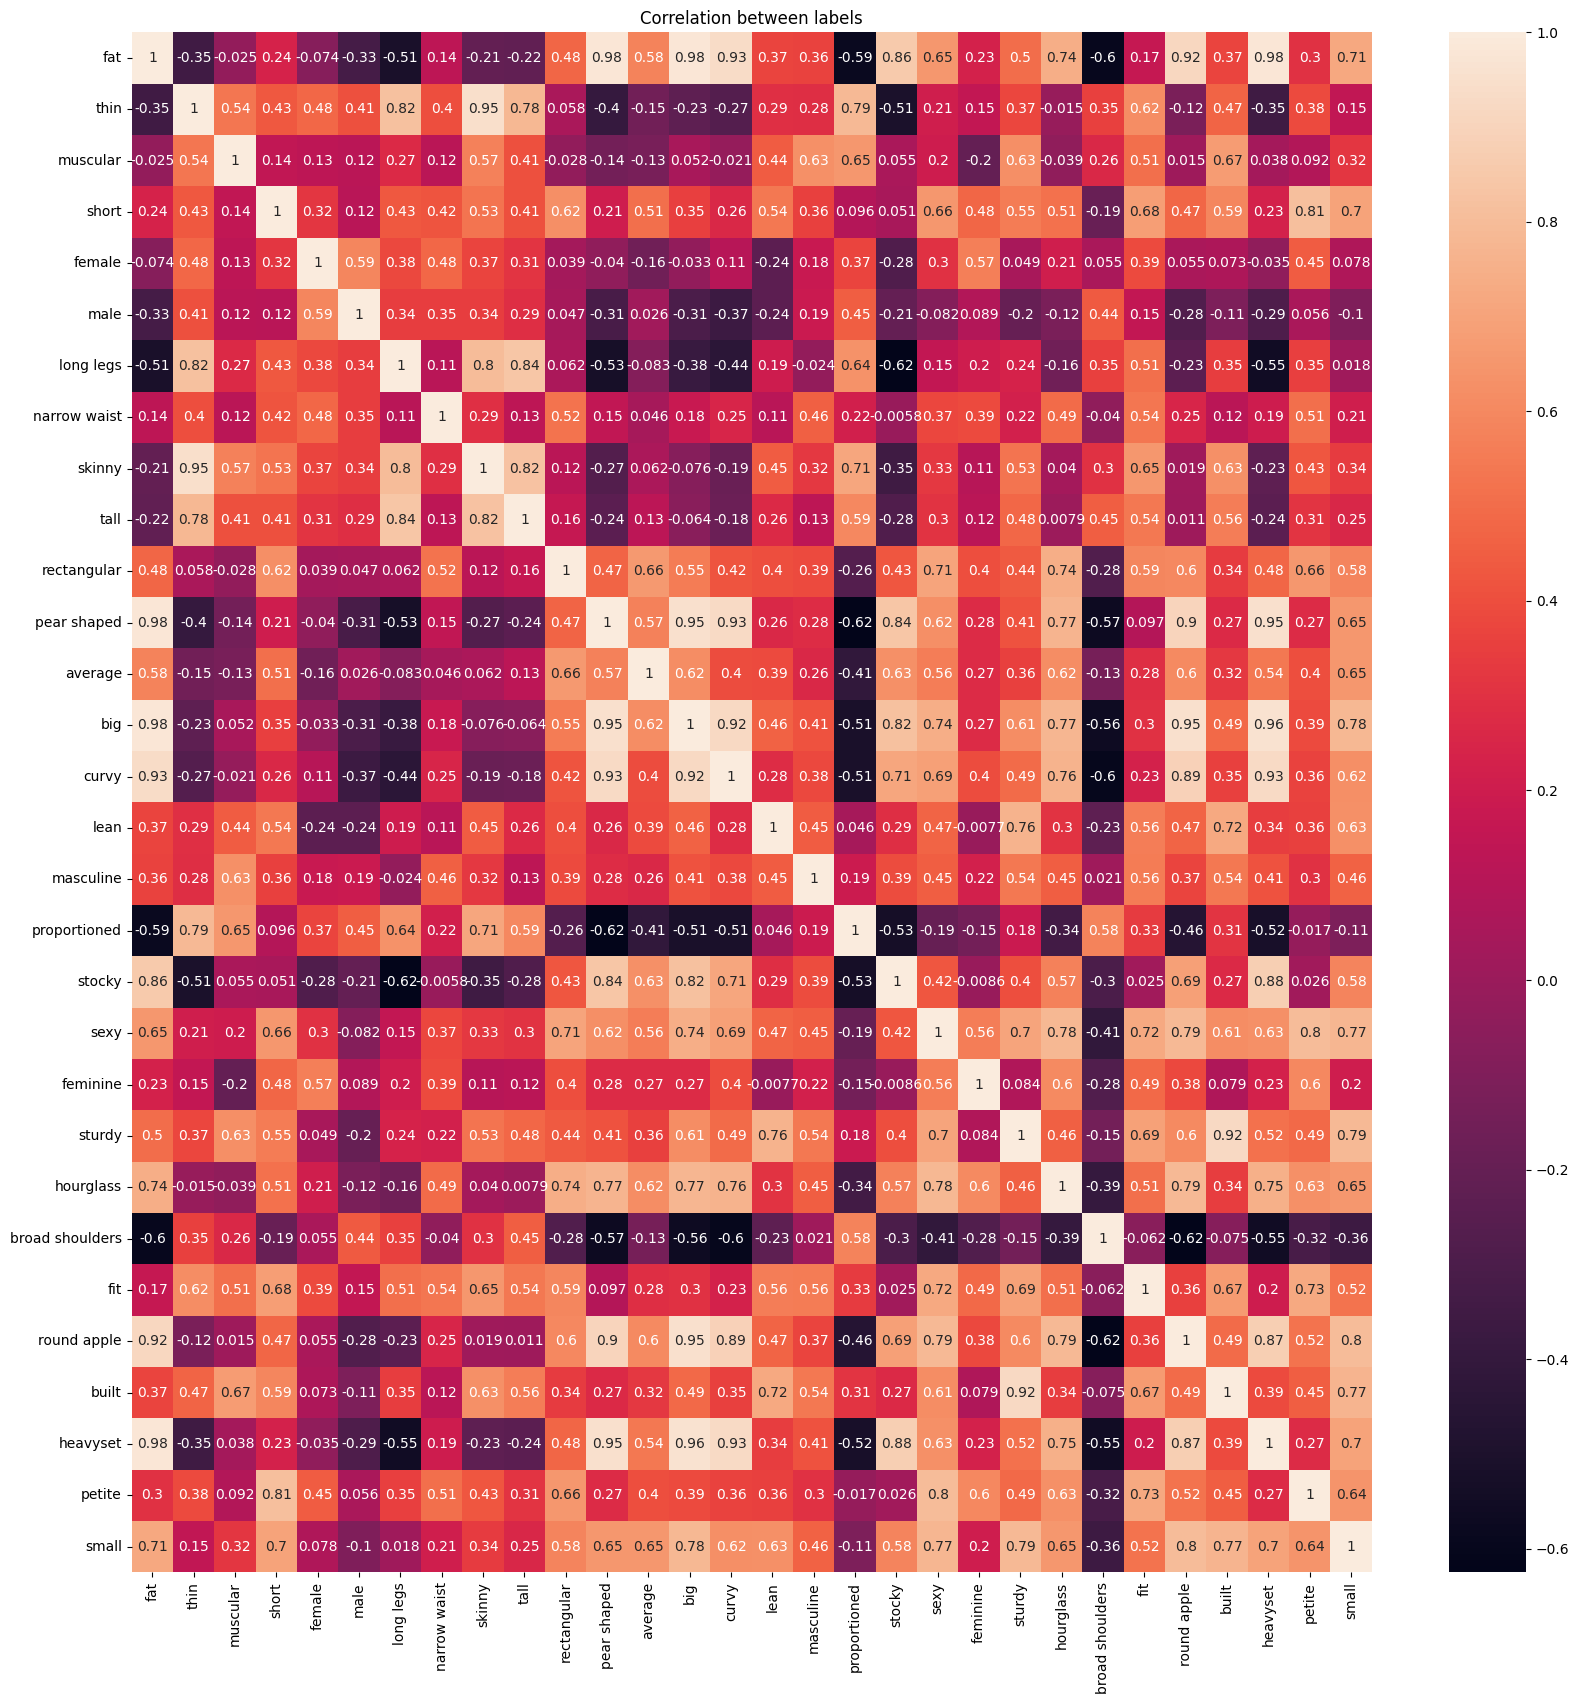

In [3]:
import seaborn as sns
# plot heatmap of correlations
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr, annot=True, ax=ax)
ax.set_title("Correlation between labels")
plt.show()

In [5]:
# get correlation between labels and filter by threshold abs(0.8)
corr = df.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr = corr.stack().reset_index()
corr.columns = ["label1", "label2", "correlation"]
corr = corr[corr["correlation"].abs() > 0.8]
corr.sort_values(by="correlation", ascending=False)

label1       label2  correlation
12           fat          big     0.980464
10           fat  pear shaped     0.979691
26           fat     heavyset     0.977174
312          big     heavyset     0.958239
279  pear shaped     heavyset     0.954286
310          big  round apple     0.953141
265  pear shaped          big     0.951514
35          thin       skinny     0.945681
13           fat        curvy     0.932621
266  pear shaped        curvy     0.930085
327        curvy     heavyset     0.926216
299          big        curvy     0.922985
403       sturdy        built     0.919184
24           fat  round apple     0.916581
277  pear shaped  round apple     0.899113
325        curvy  round apple     0.885825
377       stocky     heavyset     0.877607
426  round apple     heavyset     0.873470
17           fat       stocky     0.859444
270  pear shaped       stocky     0.839091
161    long legs         tall     0.838300
204       skinny         tall     0.824686
303          big       stocky     0.821215
33          thin    long legs     0.816984
108        short       petite     0.814997
388         sexy       petite     0.802921
428  round apple        small     0.800416

In [16]:
labels

[['fat'],
 ['thin'],
 ['muscular'],
 ['short'],
 ['female'],
 ['male'],
 ['long legs'],
 ['narrow waist'],
 ['skinny'],
 ['tall'],
 ['rectangular'],
 ['pear shaped'],
 ['average'],
 ['big'],
 ['curvy'],
 ['lean'],
 ['masculine'],
 ['proportioned'],
 ['stocky'],
 ['sexy'],
 ['feminine'],
 ['sturdy'],
 ['hourglass'],
 ['broad shoulders'],
 ['fit'],
 ['round apple'],
 ['built'],
 ['heavyset'],
 ['petite'],
 ['small']]

In [18]:
for idx, value in corr.iterrows():
    print(value.label1)
    print(labels.index([value.label1]))
    break

fat
0


In [14]:
from clip2mesh.utils import Utils, Pytorch3dRenderer

utils = Utils()
renderer = Pytorch3dRenderer(dist=2.4, elev=8.6, azim=2.1, texture_optimization=True)

# Load the model
model, labels = utils.get_model_to_eval("/home/nadav2/dev/repos/Thesis/pre_production/correlations_check.ckpt")

In [1]:
labels

NameError: name 'labels' is not defined

In [6]:
import torch
import numpy as np

fat_1 = torch.tensor([[30.0]])
fat_2 = torch.tensor([[15.0]])
others = torch.ones(1, 29) * 20.0

total_1 = torch.cat([fat_1, others], dim=1)
total_2 = torch.cat([fat_2, others], dim=1)

betas_1 = model(total_1.cuda())
betas_2 = model(total_2.cuda())

verts_1, faces_1, _, _ = utils.get_smplx_model(betas=betas_1.cpu())
verts_2, faces_2, _, _ = utils.get_smplx_model(betas=betas_2.cpu())


In [7]:
regular_betas = model((torch.ones(1, 30) * 20.0).cuda())
verts, faces, _, _ = utils.get_smplx_model(betas=regular_betas.cpu())

In [13]:
# get the vertices which changed the most
verts_1 = torch.tensor(verts_1)
verts_2 = torch.tensor(verts_2)
diff = torch.abs(verts_1 - verts_2)
indices = diff.sum(dim=1).topk(500).indices

In [14]:
# color the vertices with the most change
verts_color = (torch.ones(verts_1.shape[0], 3) * 0.7)[None]
verts_color[0, indices] = torch.tensor([1.0, 0.0, 0.0])

verts = torch.tensor(verts).cuda()
faces = torch.tensor(faces).cuda()
verts_color = torch.tensor(verts_color).cuda()
img = renderer.render_mesh(verts=verts, faces=faces, texture_color_values=verts_color)

In [15]:
from PIL import Image
def adjust_rendered_img(img: torch.Tensor):
    img = np.clip(img.cpu().numpy()[0, ..., :3] * 255, 0, 255).astype(np.uint8)
    return img

In [16]:
import matplotlib.pyplot as plt

image = adjust_rendered_img(img)

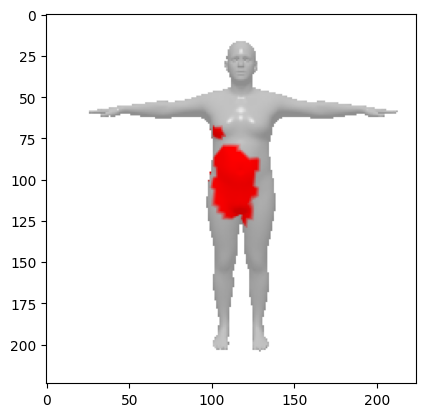

In [17]:
plt.imshow(image)